In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("forestfires.csv")
print(df.info())
print(df.describe())
print(df.isnull().sum())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


#### Assignment 1

In [452]:
def convert_month(month: str) -> int:
    month_dict = {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
        "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
    }
    return month_dict[month]

def convert_day(day: str) -> int:
    day_dict = {
        "sun": 0, "mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5, "sat": 6
    }
    return day_dict[day]

# Chuẩn hóa chuỗi trước khi convert
df['month'] = df['month'].str.lower().str.strip().apply(convert_month)
df['day'] = df['day'].str.lower().str.strip().apply(convert_day)

print("\nConverted month and day:")
print(df[['month', 'day']].head())

X = df.drop(columns=["area"])
y = df["area"].values.reshape(-1, 1)


Converted month and day:
   month  day
0      3    5
1     10    2
2     10    6
3      3    5
4      3    0


In [453]:
#Tách dữ liệu Train
X = df.drop('area', axis = 1)
y = df['area']

#Chia dữ liệu 80/20
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

#### Ordinary Least Square
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$


In [454]:
class LinearRegression_np:
    def __init__(self):
        self.theta = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        XT_X = X.T @ X
        XT_y = X.T @ y
        self.theta = np.linalg.solve(XT_X, XT_y)

    def predict(self, X: np.ndarray):
        return X @ self.theta

    def rmse(self, y_true: np.ndarray, y_pred: np.ndarray):
        return np.sqrt(np.mean((y_true - y_pred)**2))

    def r2(self, y_true: np.ndarray, y_pred: np.ndarray):
        y_true = y_true.astype(np.float64)
        return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [455]:
#Train Model
lr = LinearRegression_np()
lr.fit(X_train, y_train)

In [456]:
##Model Evaluation
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)
#Root Mean Squared Error
rmse = lambda y_true, y_pred: np.sqrt(np.mean((y_true - y_pred) ** 2))
#Coefficient of Determination
r2   = lambda y_true, y_pred: 1 - np.sum((y_true - y_pred)**2)/np.sum((y_true - np.mean(y_true))**2)

print("Train RMSE:", rmse(y_train, y_train_pred))
print("Test  RMSE:", rmse(y_test, y_test_pred))
print("Train R2:", r2(y_train, y_train_pred))
print("Test  R2:", r2(y_test, y_test_pred))

Train RMSE: 58.074534500076176
Test  RMSE: 79.42477263962972
Train R2: 0.02148024171414653
Test  R2: 0.009823011359116007


In [457]:
feature_names = ["bias", "X", "Y", "month", "day", "FFMC", "DMC", "DC",
                 "ISI", "temp", "RH", "wind", "rain"]

print("Theta:")
for name, coef in zip(feature_names, lr.theta):
    print(f"{name:>6}: {coef:.4f}")

Theta:
  bias: 0.9339
     X: -0.3473
     Y: 2.9727
 month: 1.6962
   day: -0.0852
  FFMC: 0.1169
   DMC: -0.0283
    DC: -0.8868
   ISI: 0.4397
  temp: -0.1830
    RH: 0.0463
  wind: -6.5474


#### Assignment 2

In [458]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) #tính trung bình và độ lệch chuẩn trên tập huấn luyện.
X_test_scaled  = scaler.transform(X_test)

# Thêm bias (intercept)
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled].astype(np.float64)
X_test_scaled_bias  = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled].astype(np.float64)

In [459]:
# Train model với dữ liệu đã chuẩn hóa
lr_scaled = LinearRegression_np()
lr_scaled.fit(X_train_scaled_bias, y_train)

In [460]:

y_train_pred_scaled = lr_scaled.predict(X_train_scaled_bias)
y_test_pred_scaled  = lr_scaled.predict(X_test_scaled_bias)

#Đánh giá
print("Train RMSE sau khi chuẩn hoá:", rmse(y_train, y_train_pred_scaled))
print("Test  RMSE sau khi chuẩn hoá:", rmse(y_test, y_test_pred_scaled))
print("Train R2 sau khi chuẩn hoá:", r2(y_train, y_train_pred_scaled))
print("Test  R2 sau khi chuẩn hoá:", r2(y_test, y_test_pred_scaled))

Train RMSE sau khi chuẩn hoá: 58.07383068881396
Test  RMSE sau khi chuẩn hoá: 79.42418341039725
Train R2 sau khi chuẩn hoá: 0.021503959133801875
Test  R2 sau khi chuẩn hoá: 0.00983770297341835


In [461]:
feature_names = ["bias", "X", "Y", "month", "day", "FFMC", "DMC", "DC",
                 "ISI", "temp", "RH", "wind", "rain"]

print("Theta sau khi chuẩn hoá:")
for name, coef in zip(feature_names, lr_scaled.theta):
    print(f"{name:>6}: {coef:.4f}")

Theta sau khi chuẩn hoá:
  bias: 11.3164
     X: 2.0954
     Y: -0.3743
 month: 7.2189
   day: 3.6640
  FFMC: -0.1674
   DMC: 6.2349
    DC: -7.1656
   ISI: -4.1015
  temp: 2.5301
    RH: -2.6699
  wind: 0.1537
  rain: -0.3635


**Kết luận: Mô hình dự đoán của Assignment 2 giống với Assignment 1 về hiệu năng, tuy nhiên sau khi chuẩn hoá các hệ số Theta đồng nhất về thang đo, đánh giá được mức độ ảnh hưởng của từng biến**

#### Assignment 3

In [462]:
#Chuẩn hóa dữ liệu cho VIF/correlation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [463]:
#Ma trận tương quan
correlation_matrix = X_scaled.corr()

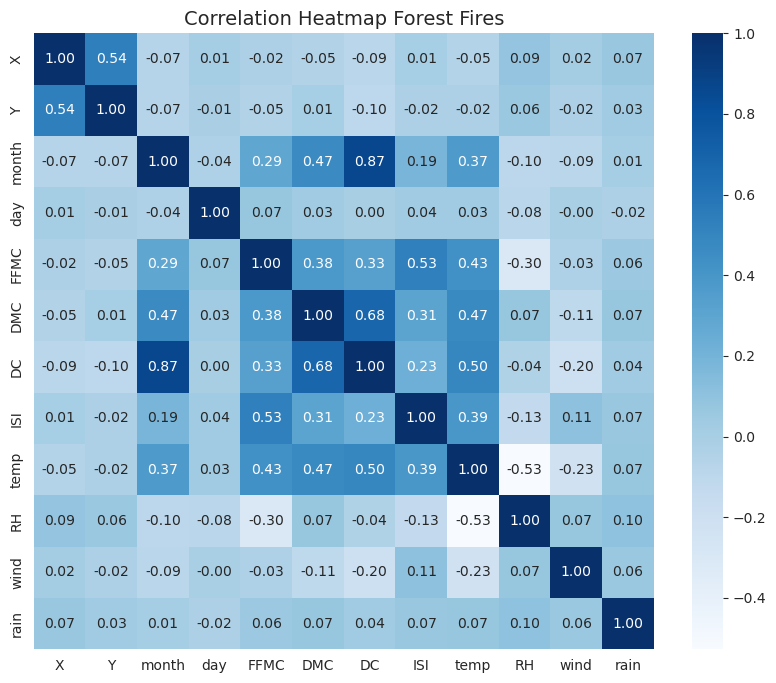

In [464]:
#Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap Forest Fires", fontsize=14)
plt.show()

In [465]:
#Loại bỏ các cột có tương quan cao (>0.6)
threshold = 0.6
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col].abs() > threshold)]
print("Cột cần loại bỏ:", to_drop)

X_reduced = X.drop(columns=to_drop)

Cột cần loại bỏ: ['DC']


In [466]:
#Thêm bias
X_reduced_bias = np.c_[np.ones(X_reduced.shape[0]), X_reduced.values]

In [467]:
#Train Model
lr_final = LinearRegression_np()
lr_final.fit(X_reduced_bias, y.values.reshape(-1,1))

In [468]:
#Dự đoán
y_pred_final = lr_final.predict(X_reduced_bias)

#Đánh giá
rmse_final = np.sqrt(np.mean((y.values.reshape(-1,1) - y_pred_final)**2))
r2_final   = 1 - np.sum((y.values.reshape(-1,1) - y_pred_final)**2) / np.sum((y.values.reshape(-1,1) - np.mean(y.values.reshape(-1,1)))**2)

print("\nFinal Model Evaluation:")
print(f"RMSE: {rmse_final:.4f}")
print(f"R2  : {r2_final:.4f}")

#Theta
feature_names_final = ["bias"] + list(X_reduced.columns)
print("\nTheta:")
for name, coef in zip(feature_names_final, lr_final.theta):
    print(f"{name:>10}: {coef[0]:.4f}")


Final Model Evaluation:
RMSE: 62.8429
R2  : 0.0235

Theta:
      bias: -10.1327
         X: 1.8627
         Y: 0.7579
     month: 0.5497
       day: 1.2472
      FFMC: -0.0931
       DMC: 0.0611
       ISI: -0.6986
      temp: 0.7607
        RH: -0.2167
      wind: 1.6092
      rain: -3.0833


#### Assignment 4

In [469]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Lấy dữ liệu ngẫu nhiên
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train Model sklearn
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [470]:
# Dự đoán
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)


In [471]:
# Đánh giá
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Train R2  :", r2_score(y_train, y_train_pred))
print("Test  R2  :", r2_score(y_test, y_test_pred))


Train RMSE: 44.76538747603
Test  RMSE: 108.28966892239977
Train R2  : 0.03640765940679214
Test  R2  : 0.005184166830083492


In [472]:
#Theta
feature_names = list(X.columns)
theta = lr.coef_.ravel()
print("Theta:")
print("bias:", lr.intercept_)
for name, coef in zip(feature_names, theta):
    print(f"{name:>6}: {coef:.4f}")

Theta:
bias: -0.14865234970005758
     X: 2.1623
     Y: -0.1198
 month: 2.0300
   day: 0.3703
  FFMC: -0.1478
   DMC: 0.1257
    DC: -0.0300
   ISI: -0.2922
  temp: 0.4673
    RH: -0.1664
  wind: 0.6116
  rain: -2.4505


**Kết luận: Do code thuần numpy sử dụng chia dữ liệu theo thứ tự, còn scikit-learn sử dụng split random, nên mô hình dự đoán có sự khác nhau. Dữ liệu dự đoán trên tập train của  cách biểu diễn hệ số hồi quy do xử lý bias/intercept và thứ tự cột.**

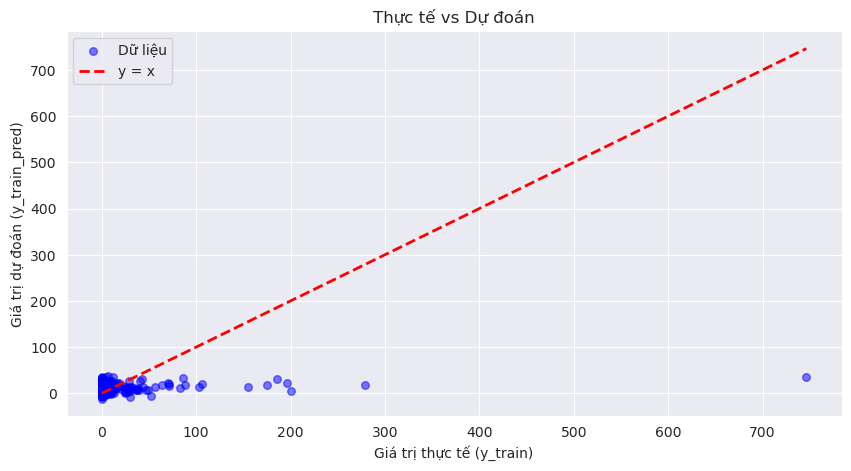

In [474]:
def plot_predictions(y_train, y_train_pred):
    plt.figure(figsize=(10, 5))
    # Vẽ scatter giữa giá trị thực tế và dự đoán
    plt.scatter(y_train, y_train_pred, c='b', s=30, alpha=0.5, label="Dữ liệu")

    # Vẽ đường y = x (đường tham chiếu)
    plt.plot([min(y_train), max(y_train)],
             [min(y_train), max(y_train)],
             'r--', linewidth=2, label="y = x")

    plt.xlabel("Giá trị thực tế (y_train)")
    plt.ylabel("Giá trị dự đoán (y_train_pred)")
    plt.title("Thực tế vs Dự đoán")
    plt.legend()
    plt.show()

# Gọi hàm với dữ liệu dự đoán
plot_predictions(y_train, y_train_pred)
